In [ ]:
# Portfolio expected return

In [2]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

D:\Python\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
tickers = ['MSFT','AAPL', 'GE', 'ENPH', 'TSLA']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='2015-1-1')['Adj Close']

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1387 entries, 2014-12-31 to 2020-07-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MSFT    1387 non-null   float64
 1   AAPL    1387 non-null   float64
 2   GE      1387 non-null   float64
 3   ENPH    1387 non-null   float64
 4   TSLA    1387 non-null   float64
dtypes: float64(5)
memory usage: 65.0 KB


In [5]:
mydata.head()

,MSFT,AAPL,GE,ENPH,TSLA
Date,,,,,
2014-12-31,41.471783,100.905785,20.953476,14.29,222.410004
2015-01-02,41.748566,99.945885,20.779354,14.21,219.309998
2015-01-05,41.364658,97.130241,20.397930,13.88,210.089996
2015-01-06,40.757530,97.139420,19.958458,12.94,211.279999
2015-01-07,41.275364,98.501518,19.966753,11.40,210.949997


In [6]:
mydata.tail()

,MSFT,AAPL,GE,ENPH,TSLA
Date,,,,,
2020-06-29,198.440002,361.779999,6.80,47.450001,1009.349976
2020-06-30,203.509995,364.799988,6.83,47.570000,1079.810059
2020-07-01,204.699997,364.109985,6.74,49.060001,1119.630005
2020-07-02,206.259995,364.109985,6.82,48.860001,1208.660034
2020-07-06,210.699997,373.850006,7.00,50.160000,1371.579956


In [7]:
mydata.iloc[0]

MSFT     41.471783
AAPL    100.905785
GE       20.953476
ENPH     14.290000
TSLA    222.410004
Name: 2014-12-31 00:00:00, dtype: float64

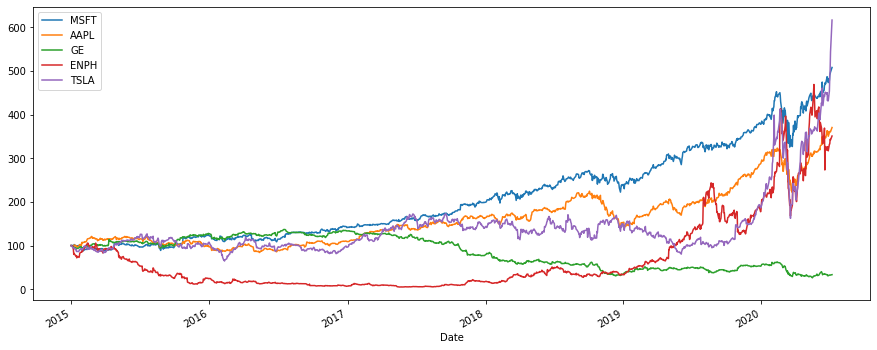

In [8]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

In [9]:
returns = (mydata/mydata.shift(1))- 1 
returns.head()

,MSFT,AAPL,GE,ENPH,TSLA
Date,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.006674,-0.009513,-0.008310,-0.005598,-0.013938
2015-01-05,-0.009196,-0.028172,-0.018356,-0.023223,-0.042041
2015-01-06,-0.014677,0.000094,-0.021545,-0.067723,0.005664
2015-01-07,0.012705,0.014022,0.000416,-0.119011,-0.001562


In [10]:
weights = np.array([0.22,0.10,0.26,0.15,0.27])

In [11]:
annual_returns = returns.mean() * 250
annual_returns

MSFT    0.330996
AAPL    0.276713
GE     -0.130292
ENPH    0.628986
TSLA    0.464574
dtype: float64

In [12]:
np.dot(annual_returns,weights)

0.28639719335695113

In [13]:
pfolio_1= str(round(np.dot(annual_returns, weights), 5) * 100) + ' %'
print (pfolio_1)

28.64 %


In [16]:
# Portfolio risk

In [19]:
cov_returns = returns.cov() * 250
cov_returns

,MSFT,AAPL,GE,ENPH,TSLA
MSFT,0.075414,0.053742,0.040432,0.060705,0.055282
AAPL,0.053742,0.080616,0.042363,0.070551,0.054170
GE,0.040432,0.042363,0.134905,0.062101,0.050535
ENPH,0.060705,0.070551,0.062101,0.817709,0.102350
TSLA,0.055282,0.054170,0.050535,0.102350,0.273705


In [20]:
weights = np.array([0.22,0.10,0.26,0.15,0.27])

In [21]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.09696544023722167

In [22]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.3113927427497656

In [23]:
print (str(round(pfolio_vol, 5) * 100) + ' %')

31.139 %
